# Project 4 _ Unsupervised Learning _ Kmeans_ Movies on google play



### Description of the chosen data:

1. Data were obtained from kaggle, its name is [Movies on Google Play](https://www.kaggle.com/fatimahaloqayli/movies-on-google-play)

2. Data has the following columns: `category`, `num_voter`, `rating`, `price`, `year_of_release`, `month_of_release`
3. the shape is 200 row and 7 columns

### Problem Statement

The problem that I'm trying to solve is that I'll divide movies category into different clusters of genre assuming that we don't have the  movie category genre column


I see this data as good candidate to apply unsupervised learning algorithm especially Kmeans clustering.
I'll use the `category` column as the target and delete it and check if the kmean model predicts the same original number of categories.


In [17]:
import pandas as pd
import numpy as np
import scipy.sparse 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.cluster as KMeans
import io

In [18]:
# import the dataset of movies-on-google-play
movies = pd.read_csv('movies.csv')
movies.head()

,movies_name,category,num_voter,rating,price,year_of_release,month_of_release
0,Pet Sematary (2019),NaN,6,3.3,14.99,2019,4
1,Alita: Battle Angel,Action & adventure,875,4.2,19.99,2019,2
2,The Intruder (Subbed),NaN,9,3.9,38.99,2019,5
3,Breakthrough,Drama,145,3.8,55.99,2019,4
4,The Aftermath,Drama,48,3.5,55.99,2019,3


In [19]:
movies.columns 

Index(['movies_name', 'category', 'num_voter', 'rating', 'price',
       'year_of_release', 'month_of_release'],
      dtype='object')

In [20]:
movies.shape

(200, 7)

In [21]:
# checking the data 
print('null values:\n', movies.isnull().sum())
print('=============================')
print('shape: ',movies.shape)
print('=============================')


null values:
 movies_name         0
category            9
num_voter           0
rating              0
price               0
year_of_release     0
month_of_release    0
dtype: int64
shape:  (200, 7)


In [22]:
movies.category.unique()

array([nan, 'Action & adventure', 'Drama', 'Comedy', 'Family', 'Horror',
       'Animation', 'Documentary'], dtype=object)

In [23]:
#we have to clean data first
# check nulls
movies[movies['category'].isnull()]

,movies_name,category,num_voter,rating,price,year_of_release,month_of_release
0,Pet Sematary (2019),NaN,6,3.3,14.99,2019,4
2,The Intruder (Subbed),NaN,9,3.9,38.99,2019,5
27,Bad Times at the El Royale,NaN,173,3.6,55.99,2018,10
75,A DARK PLACE,NaN,6,4.5,14.99,2019,4
76,Capernaum,NaN,22,3.4,14.99,2018,9
137,Rabid Dogs,NaN,0,0.0,14.99,2015,9
172,NARCOPOLIS,NaN,0,0.0,14.99,2015,9
177,الحرب الباردة,NaN,0,0.0,14.99,2018,12
184,أفق,NaN,2,3.0,14.99,2018,11


In [55]:
# delete nulls since they are few
movies.dropna(axis=0,inplace=True)

In [25]:
movies.category.nunique()

7

In [94]:
movies.category.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=object)

In [26]:
# check features types
movies.dtypes

movies_name          object
category             object
num_voter            object
rating              float64
price                object
year_of_release       int64
month_of_release      int64
dtype: object

In [27]:
# changing types to numeric values

In [28]:
movies['num_voter'] = movies['num_voter'].str.replace(",","").astype(float)

In [29]:
movies['rating'] = movies['rating'].astype(float)
movies['price'] = movies['price'].astype(float)

In [30]:
# transfer category from object to integer so i can use it in the analysis
movies['category'].replace(['Action & adventure', 'Drama', 'Comedy', 'Family', 'Horror',
       'Animation', 'Documentary','no cateogry'],[1,2,3,4,5,6,7,8] ,inplace=True) 

In [58]:
movies.head()

,category,num_voter,rating,price,year_of_release,month_of_release
1,1,875.0,4.2,19.99,2019,2
3,2,145.0,3.8,55.99,2019,4
4,2,48.0,3.5,55.99,2019,3
5,3,21.0,3.0,36.99,2019,2
6,2,39.0,4.2,36.99,2019,4


In [59]:
#check types
movies.dtypes

category             object
num_voter           float64
rating              float64
price               float64
year_of_release       int64
month_of_release      int64
dtype: object

/Users/Abubattal/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Abubattal/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


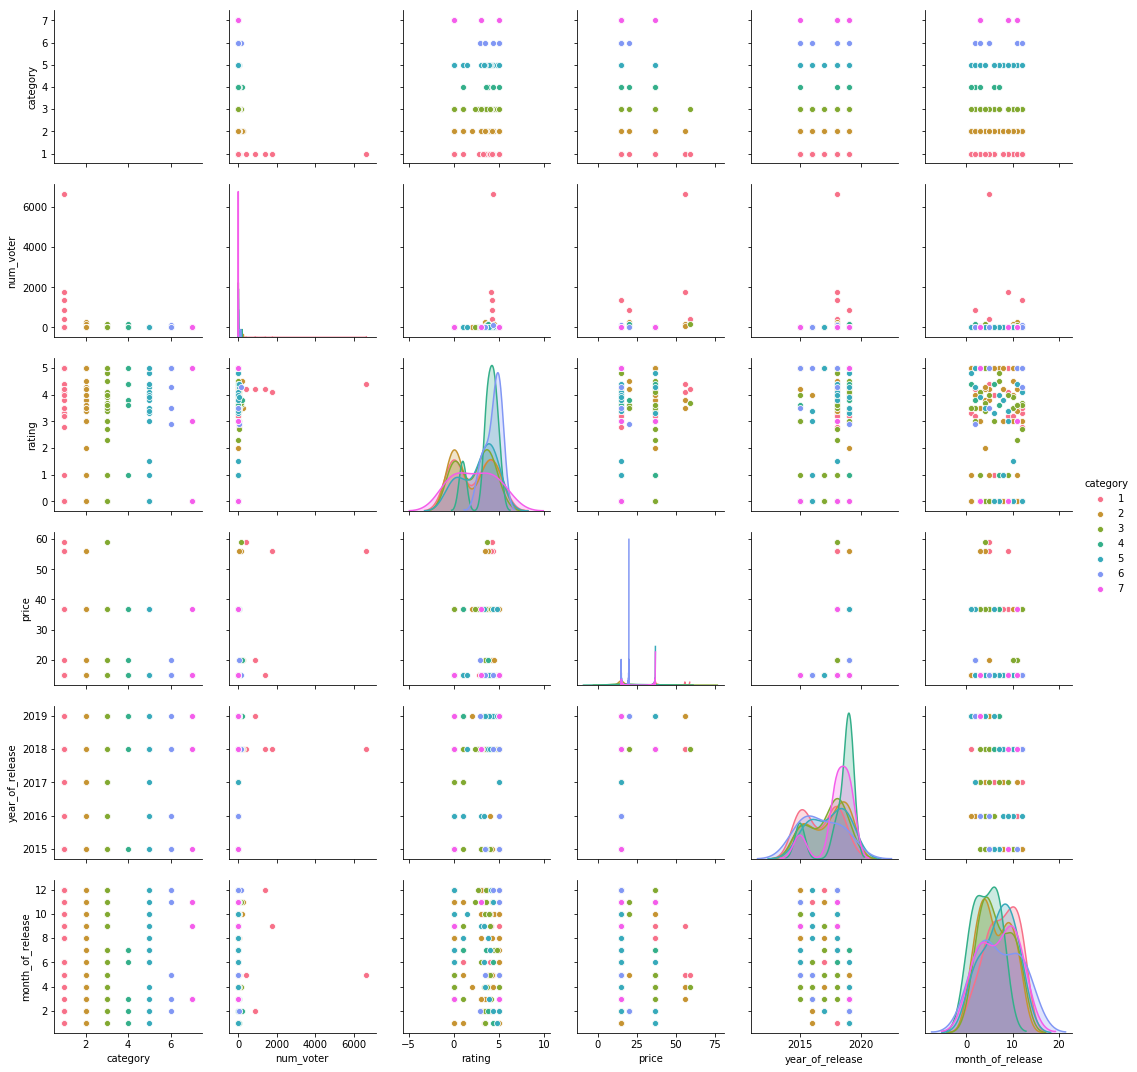

In [33]:
# look at the category 
sns.pairplot(data=movies, hue='category', palette="husl");

In [34]:
# I will drop the movies name columns since it is categoriacal 
movies.drop('movies_name', axis=1, inplace=True)


In [35]:
# drop 'cateogry' column, and set it as the target
X = movies.drop('category', axis = 1)
y = movies.category

In [36]:
#necessary processing imports: Standariztion!
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

In [37]:
SS = StandardScaler()
X = SS.fit_transform(X)

/Users/Abubattal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Abubattal/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
from sklearn.cluster import KMeans

# Since I know number clusters (unique values of category column),
#I will start guessing the number of clusters with 7 cluster as the first guess
k_mean = KMeans(7)
k_mean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
# Getting the Labels and centroids for 7 Clusters
labels = k_mean.labels_
print(labels)
clusters = k_mean.cluster_centers_
clusters

[4 0 0 0 0 4 5 0 5 0 5 4 0 4 4 1 4 0 1 1 3 0 0 1 1 0 1 4 1 5 0 1 5 0 0 0 5
 5 0 2 5 0 0 0 0 1 2 5 5 0 4 0 4 4 7 7 7 0 5 4 7 4 0 0 5 2 2 2 6 5 5 2 4 4
 7 7 1 7 7 7 7 7 6 7 1 7 7 1 4 7 7 6 6 2 2 7 7 7 4 7 1 1 2 2 1 2 2 6 4 6 2
 1 1 7 1 2 1 2 1 2 1 2 6 2 2 1 2 2 4 1 4 2 2 2 1 2 2 2 6 6 1 4 2 2 2 2 4 4
 6 1 7 2 7 1 4 6 2 4 7 6 2 6 6 6 7 1 6 4 4 4 1 4 4 1 7 4 1 2 1 2 7 7 7 7 7
 7 7 6 6 6 7]


array([[ 8.03723072e-02,  7.96902818e-01,  1.93713517e+00,
         1.06092502e+00, -8.19986122e-01],
       [ 7.38901676e-03,  7.62322859e-01, -4.53365094e-01,
         5.11897189e-01,  1.11104057e+00],
       [-1.33842337e-01, -1.13653973e+00, -5.12151743e-01,
        -8.61819075e-01,  8.27447360e-01],
       [ 1.29216529e+01,  9.93580215e-01,  3.34425239e+00,
         5.32537333e-01, -4.93286742e-01],
       [-5.35697919e-02,  6.82339891e-01, -4.49445984e-01,
         9.72860409e-01, -1.18363365e+00],
       [-1.24221002e-01, -1.98404005e-01,  1.55713828e+00,
         6.74069750e-01,  7.15167598e-01],
       [-1.29192792e-01,  8.91634196e-01, -5.12151743e-01,
        -1.27510477e+00,  7.47525941e-02],
       [-1.33771592e-01, -1.14790124e+00, -5.12151743e-01,
        -7.88431895e-01, -5.96238227e-01]])

In [95]:
# check the silhouette score for 7 clusters model
from sklearn.metrics import silhouette_score
silhouette_score(X, labels)

0.4300900968246794

In [42]:
# Considering silhouette is on a scale of -1 to 1, 0.43 isnt too bad.

/Users/Abubattal/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Abubattal/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Abubattal/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Abubattal/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


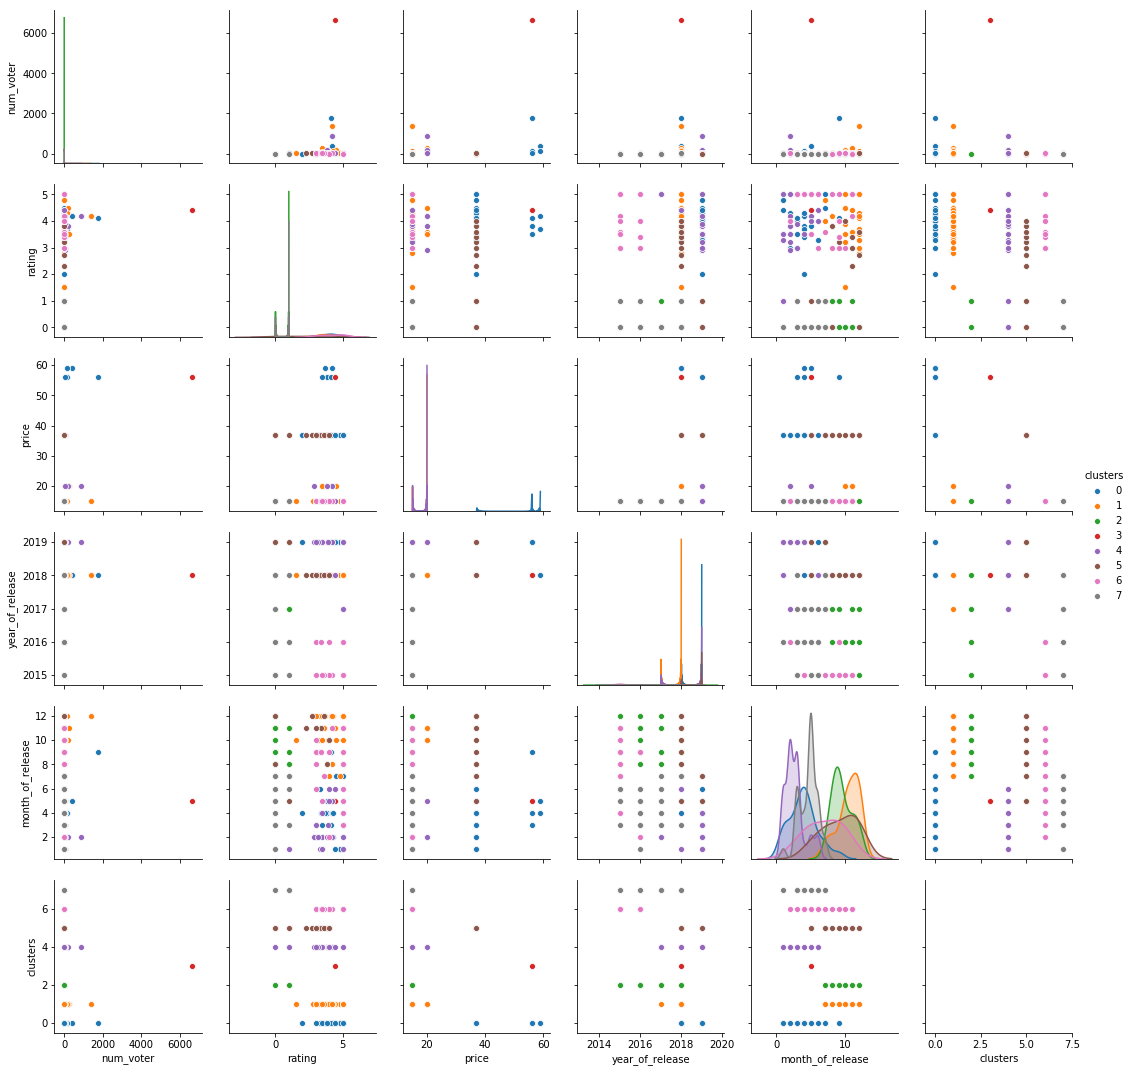

In [96]:
# visually examine the cluster that have been created
X_8 = movies.drop('category', axis=1)
X_8['clusters']=labels
sns.pairplot(data=X_8, hue='clusters');

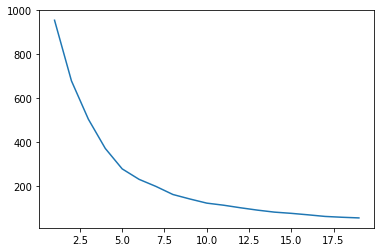

In [99]:
#1#*** using elbow method to find the optimal number of clusters
inertia = {}
# for k in range(1, movies.shape[0]):
for k in range(1, 20): # for plotting
    model = KMeans(n_clusters=k).fit(X)
    inertia[k] = model.inertia_
    
plt.plot(list(inertia.keys()), list(inertia.values()))

In [ ]:
# from elbow method we can the optimal k is around 11

In [51]:
#2#*** find the optimal clusters number (k)
def opt_cluster(ran, data):
    cluster(ran, data, 'default')
    
    # normalized version
    Xn = normalize(data)
    cluster(ran, Xn, 'normalized')
    
    # standard scale version
    SS = StandardScaler()
    Xs = SS.fit_transform(data)
    cluster(ran, Xs, 'standard_scaler')
    
    # minmax scale version
    MM = MinMaxScaler()
    Xmm = MM.fit_transform(data)
    cluster(ran, Xmm, 'min_max_scaler')

    return results.loc[results['silhouette'].idxmax()]


In [100]:
ran = range(2,20)
opt_cluster(ran,X)

k                    c11
silhouette       0.49613
processing    normalized
Name: 19, dtype: object

In [53]:
# we have the optimal number of cluster is 11 (k=11)
# we have sihouette score as 0.496133 better than sihouette score =0.43 that we got before with k=7 

/Users/Abubattal/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Abubattal/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Abubattal/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Abubattal/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


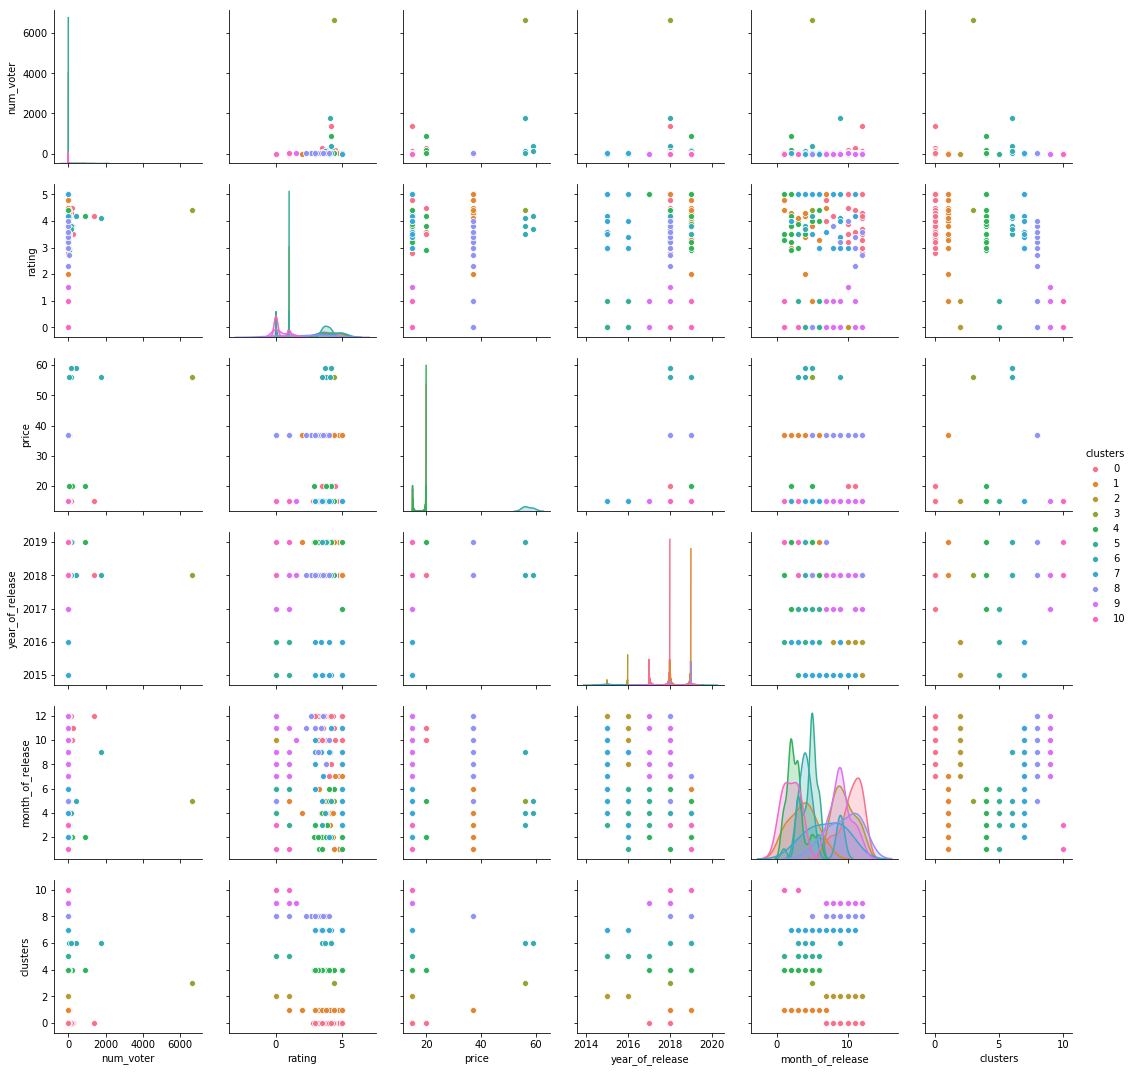

In [54]:
# build the model with the found optimal parameters 
k_mean_opt = KMeans(n_clusters=11)
k_mean_opt.fit(X)
labels_opt = k_mean_opt.labels_

# no preprocessing required since default was the highest silouette
X_opt = movies.drop('category', axis=1)

X_opt['clusters']=labels_opt
sns.pairplot(data=X_opt, hue='clusters');


#### Kmeans model suggest that we have  11 clusters where in real data we 7 cluster. Not bad, eh!